In [1]:
import scipy.io
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

[[array(['S001'], dtype='<U4')]
 [array(['S001'], dtype='<U4')]
 [array(['S001'], dtype='<U4')]
 ...
 [array(['H006_R'], dtype='<U6')]
 [array(['H006_R'], dtype='<U6')]
 [array(['H006_R'], dtype='<U6')]]
[[array(['original'], dtype='<U8')]
 [array(['original'], dtype='<U8')]
 [array(['original'], dtype='<U8')]
 ...
 [array(['hypertensive'], dtype='<U12')]
 [array(['hypertensive'], dtype='<U12')]
 [array(['hypertensive'], dtype='<U12')]]
(20444, 1000, 3)
(20444, 2)
torch.Size([16, 3, 1000])


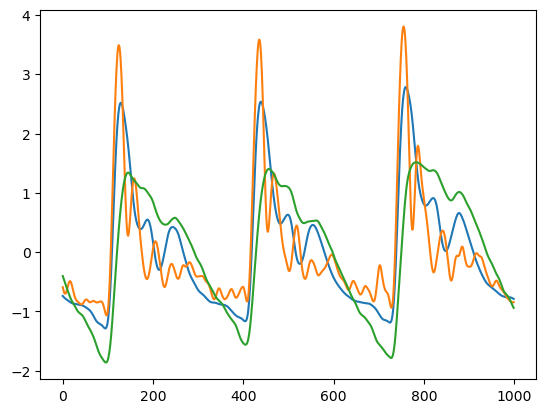

: 

In [ ]:
waveform = scipy.io.loadmat(
    "/Users/tianrui.qi/Library/Mobile Documents/com~apple~CloudDocs/Research/RoblyerLab/data/waveform/raw.mat"
)["data_store"][0, 0]

x = waveform[0]
y = waveform[1]
subject_ids = waveform[2]
groups = waveform[3]
repeats = waveform[4]
conditions = waveform[5]

print(subject_ids)
print(groups)
print(x.shape)
print(y.shape)

x = torch.from_numpy(x[0:16]).permute(0, 2, 1).float()
print(x.shape)
# plot x
plt.plot(x[0, 0, :])
plt.plot(x[0, 1, :])
plt.plot(x[0, 2, :])
plt.show()

In [ ]:
import src

D = 256
C_max = 8
L_max = 200
S = 40
stride = 20

tokenizer = src.model.Tokenizer(S, stride)
collator  = src.model.Masking()
embedding = src.model.Embedding(D, S, C_max, L_max).train().to(device="mps")
transfomer = src.model.Transformer(D, 4, D//32, D*4).train().to(device="mps")

x = x.to(device="mps")

channel_idx = torch.arange(
    x.shape[1], device=x.device
)[None, :].repeat(x.shape[0], 1)
print(x.device, channel_idx.device)

tokens = tokenizer(x)
print(tokens.device)
mlm_mask, mlm_mode, mlm_rand = collator(tokens)
print(mlm_mask.device, mlm_mode.device, mlm_rand.device)
embd_input = embedding(tokens, channel_idx, mlm_mask, mlm_mode, mlm_rand)
print(embd_input.device)
embd_input = embd_input.reshape(
    (embd_input.shape[0], embd_input.shape[1]*embd_input.shape[2], D)
)
print(embd_input.device)
representation = transfomer(embd_input)
print(representation.device)

mps:0 mps:0
mps:0
